### 100,000 UK Used Car Data set
https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes


1. Выбрать набор данных для своей группы: <br>
    3530203_70101: Audi <br>
    3530203_70102: BMW <br>
    3530903_70301: Ford <br>
    3530903_70302: Mercedes<br>
    
2. Разбить данные на тренировочные и тестовые (70% на 30%, random_state=10).
3. Попытаться обучить регрессии c лучшим качеством. 


In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [174]:
auto_data = pd.read_csv("merc.csv")
auto_data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
...,...,...,...,...,...,...,...,...,...
13114,C Class,2020,35999,Automatic,500,Diesel,145,55.4,2.0
13115,B Class,2020,24699,Automatic,2500,Diesel,145,55.4,2.0
13116,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.5,2.1
13117,CLS Class,2019,37990,Automatic,2426,Diesel,145,45.6,2.0


In [175]:
auto_data['mpg'] = pd.cut(auto_data['mpg'], 60)

auto_data_dummy = pd.concat([auto_data.drop(['mpg','tax','model','transmission','fuelType','engineSize'], axis=1), 
                             pd.get_dummies(auto_data['model']),
                             pd.get_dummies(auto_data['transmission']),
                             pd.get_dummies(auto_data['fuelType']),
                             pd.get_dummies(auto_data['engineSize']),
                             pd.get_dummies(auto_data['tax']),
                             pd.get_dummies(auto_data['mpg'])
                            ], axis = 1)

In [176]:
X, Y = bike_data_dummy.drop(['price'], axis=1), bike_data_dummy['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [177]:
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

In [190]:
model = RandomForestRegressor(random_state = 10, n_estimators = 100, max_depth=20)

model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

pd.DataFrame(model.feature_importances_, bike_data_dummy.columns[1:], columns=['Importance']).sort_values('Importance')

RMSE = 2816.461


,Importance
"(116.407, 120.01]",0.000000
"(4.703, 8.307]",0.000000
"(127.217, 130.82]",0.000000
"(123.613, 127.217]",0.000000
180,0.000000
...,...
5.5,0.026715
price,0.083914
3.0,0.120135
4.0,0.158092


Text(0, 0.5, 'Target')

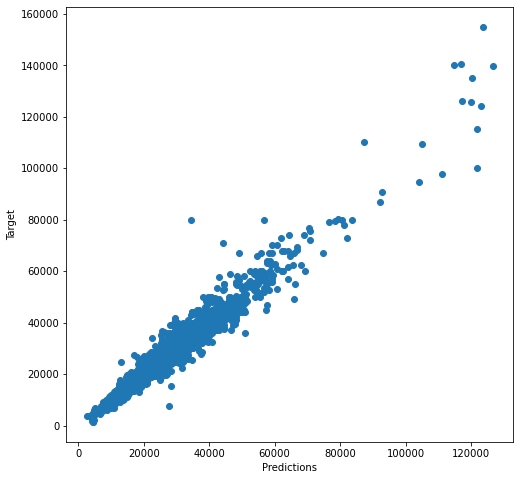

In [191]:
plt.figure(figsize=(8, 8))
plt.scatter(predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')
#имхо выглядит уже достаточно секси